In [3]:
import pandas as pd
import seaborn as sbn
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/XAU_1d_data_2004_to_2024-09-20.csv")

In [122]:
df.head()

,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,00:00,384.0,384.8,382.8,384.1,272
1,2004.06.14,00:00,384.3,385.8,381.8,382.8,1902
2,2004.06.15,00:00,382.8,388.8,381.1,388.6,1951
3,2004.06.16,00:00,387.1,389.8,382.6,383.8,2014
4,2004.06.17,00:00,383.6,389.3,383.0,387.6,1568


# Price evolution

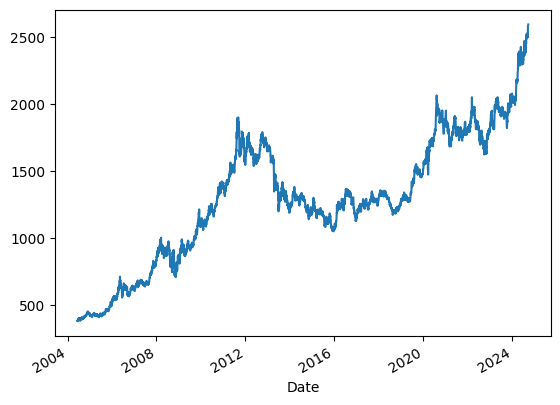

In [26]:
df["Close"].plot()
plt.show()

In [6]:
df.drop(columns=["Time"],inplace=True)

In [7]:
df.index=pd.to_datetime(df["Date"])
df.drop("Date",inplace=True,axis=1)

# Relating Volume and Price Close

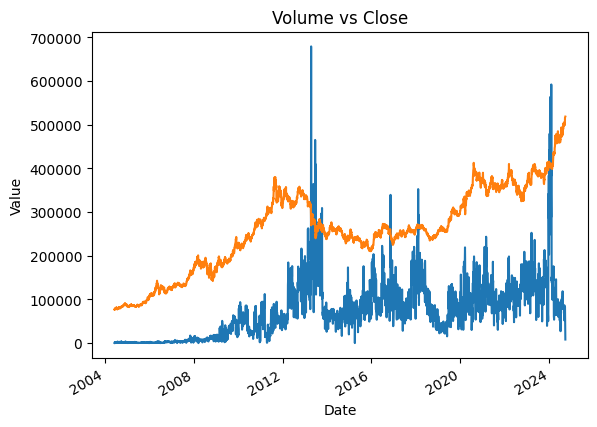

In [25]:
plt.title("Volume vs Close")
plt.ylabel("Value")
df["Volume"].plot()
(df["Close"]*200).plot()
##Mutiplying by 200 to scale it
plt.show()

We dont see any relation between volume and the price rising. Moreover, since we wont have values like volume to predict the future values, we will only use dates by creating three columns for day, month and year.

# Creating variables

In [13]:
df["Day"]=df.index.day
df["Month"]=df.index.month
df["Year"]=df.index.year

In [14]:
df.tail()

,Open,High,Low,Close,Volume,Day,Month,Year
Date,,,,,,,,
2024-09-10,2506.13,2518.37,2500.15,2516.71,75158,10,9,2024
2024-09-11,2516.59,2528.88,2501.15,2512.27,81323,11,9,2024
2024-09-12,2512.06,2560.12,2511.01,2559.03,79038,12,9,2024
2024-09-13,2558.19,2586.09,2556.74,2580.30,82666,13,9,2024
2024-09-19,2592.20,2593.39,2591.51,2592.29,8253,19,9,2024


# Creating train data and labels

In [15]:
x = df[["Day", "Month", "Year"]]
y=df["Close"]

In [16]:
reg=xgb.XGBRegressor(n_estimators=1000)
reg.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Creating dates from 09/20 to 12/31, so we will predict the rest of 2024

In [17]:
start_date = '2024-09-20'
end_date = '2024-12-31'

date_range = pd.date_range(start=start_date, end=end_date)

dates = pd.DataFrame(date_range, columns=['Date'])


#Creating columns for the prediction df

In [18]:
dates.index=dates["Date"]
dates.drop(["Date"],axis=1,inplace=True)
dates["Day"] = dates.index.day
dates["Month"] = dates.index.month
dates["Year"] = dates.index.year

# Predicting

In [19]:
dates["Pred"]=reg.predict(dates)

# Ploting only predictions

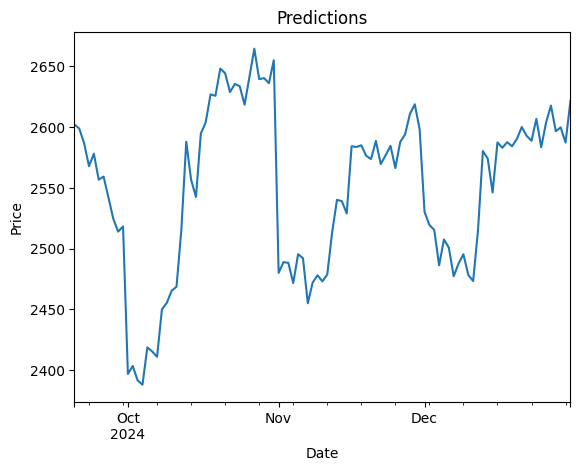

In [24]:
dates["Pred"].plot()
plt.ylabel("Price")
plt.title("Predictions")
plt.show()

# Predictions with Price evolution

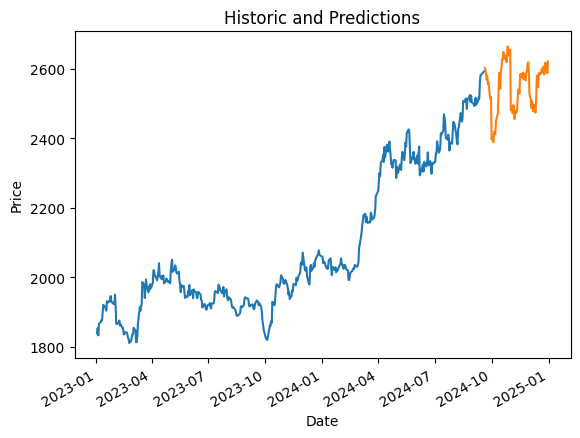

In [23]:
df.loc[(df["Year"]>2022)]["Close"].plot()
dates["Pred"].plot()
plt.title("Historic and Predictions")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()